## 데이터프레임 활용Tip 10
#1. 데이터프레임과 시리즈 만들기

In [15]:
import numpy as np
import pandas as pd

#시리즈로 만들기
my_series = pd.Series({"United Kingdom":"London", "India":"New Delhi", "United States":"Washington", "Belgium":"Brussels"})
print(pd.DataFrame(my_series))
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]))

# 몇행몇열
print(df.shape)

# 몇행 확인
print(len(df.index))
df[0].count()	#NaN은 제외하고 카운트
list(df.columns.values)

                         0
United Kingdom      London
India            New Delhi
United States   Washington
Belgium           Brussels
(2, 3)
2


[0, 1, 2]

#2. Index, Column 선택하기

In [16]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6],[7,8,9]]), columns=['A','B','C'])
df.A    #특정 컬럼 선택, Series
df['A']

#.loc[]: 인덱스 라벨에 사용,loc[2]이면, 2라는 라벨을 갖는 인덱스를 의미
#.iloc[]: 인덱스에 사용, iloc[2]는 2의 위치(3번째)의미

df.iloc[ 0 , 1 ]  #numpy array 처럼 사용하기
df.iloc[ :, 1 ]

df.loc[: , 'A']
df.loc[ 1, 'B'] #여기서1은 index가 1을 의미
df.iloc[ 1, 1 ] #여기서의 1은 두번째값이라는 의미

#print(df.iloc[0][0])	# iloc[]
#print(df.loc[0]['A'])	# loc[]
#print(df.iloc[0])	# iloc[]로 행선택

print(df.loc[:,'A'])	# loc[]로 열선택
print(df.loc[0,'A'])	
print(df.iloc[0,0])	

#df에서 2행, 1-2열 선택하시오.
df.iloc[ 1  , 0:2  ]

#df에서 2-3행, 1-3열 선택하시오.
df.iloc[ 1:3,  :  ]

0    1
1    4
2    7
Name: A, dtype: int64
1
1


A  B  C
1  4  5  6
2  7  8  9

#3. Index, Row, Column 추가

In [17]:
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]), columns=['A','B','C'])
df.set_index('C')	# C열이 index로 지정됨

#열 추가
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
df['D'] = df.index

#열 추가2
df = pd.DataFrame(data=np.array([[1, 1, 2], [3, 2, 4]]))
df.loc[:, 4] = pd.Series(['5', '6'], index=df.index)	# Append a column to `df`
print(df)

# reset_index()로 인덱스 값 재설정
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), index= [2.5, 12.6, 4.8], columns=[48, 49, 50])
df_reset = df.reset_index(level=0, drop=True)	#drop 인덱스 제거, inplace 기존 인덱스가 새로운 컬럼으로 추가됨
print(df_reset)


   0  1  2  4
0  1  1  2  5
1  3  2  4  6
   48  49  50
0   1   2   3
1   4   5   6
2   7   8   9


#4. index, row, column 삭제

In [18]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [40, 50, 60], [23, 35, 37]]),index= [2.5, 12.6, 4.8, 4.8, 2.5],  columns=[48, 49, 50])
df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

# A 열 삭제
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
df.drop('A', axis=1, inplace=True)
df.drop(df.columns[[1]], axis=1)	#axis 0: row, 1: column

#행 삭제
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [40, 50, 60], [23, 35, 37]]),index= [2.5, 12.6, 4.8, 4.8, 2.5],  columns=[48, 49, 50])
print(df.drop(df.index[1]))	# 인덱스 1 위치 행 삭제



     48  49  50
2.5   1   2   3
4.8   7   8   9
4.8  40  50  60
2.5  23  35  37


#5. 데이터프레임 값 변경

In [19]:
# 문자열을 0~4로 교체
df = pd.DataFrame(data=np.array([['OK', 'Perfect', 'Acceptable'], ['Awful','Awful', 'Perfect'], ['Acceptable', 'OK', 'Poor']]), columns=['Student1', 'Student2', 'Student3'])
df.replace(['Awful', 'Poor', 'OK', 'Acceptable', 'Perfect'], [0, 1, 2, 3, 4]) 	

#정규표현식으로 문자열 제거
df = pd.DataFrame(data=np.array([['1\n', 2, '3\n'], [4, 5, '6\n'], [7, '8\n', 9]]))
df.replace({'\n': '<br>'}, regex=True)	

#값 변경
df = pd.DataFrame(data=np.array([[1, 2, '+3b'], [4, 5, '-6b'], [7, 8, '+9A']]), columns=['class', 'test', 'result'])
df['result'] = df['result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))


#열의 텍스트를 여러 줄로 나누기
df = pd.DataFrame(data=np.array([[34, 0, '23:44:55'], [22, 0, '66:77:88'], [19, 1, '43:68:05 56:34:12']]), columns=['Age', 'PlusOne', 'Ticket'])

# 3행에 값이 2개인 ticket 열을 여러 줄로 나누고 시리즈로 만들고 값을 추가
ticket_series = df['Ticket'].str.split(' ').apply(pd.Series, 1).stack()
ticket_series.index = ticket_series.index.droplevel(-1)	#인덱스가 여러개여서, 2번째 인덱스 삭제
ticketdf = pd.DataFrame(ticket_series)
del df['Ticket']
df.join(ticketdf)



Age PlusOne         0
0  34       0  23:44:55
1  22       0  66:77:88
2  19       1  43:68:05
2  19       1  56:34:12

#6.데이터프레임에 함수 적용

In [20]:

#행/열에 함수 적용
def doubler(x):
    if x % 2 == 0:
        return x
    else:
        return x * 2

df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
df['A'].apply(doubler)	# doubler라는 함수를 A열에 적용
doubled_df = df.applymap(doubler)	# `applymap()`는 데이터프레임 전체에 행/열 단위 적용시
print(doubled_df)


    A   B   C
0   2   2   6
1   4  10   6
2  14   8  18


#7. 데이터프레임 탐색, Missing Value 확인 및 비어있는 DF 만들기


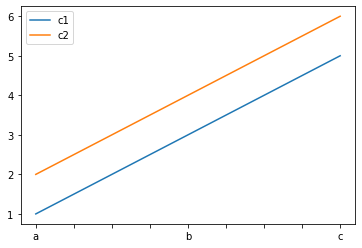

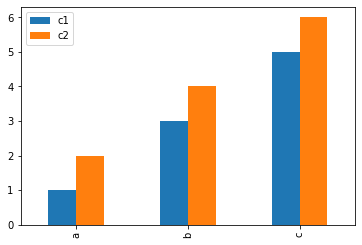

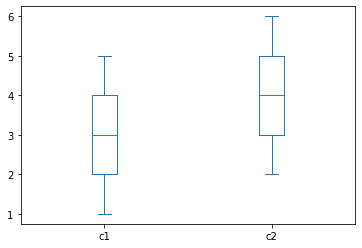

In [21]:
df1 = pd.DataFrame( [[1,2], [3,4], [5,6]],
                   index=['a', 'b', 'c'],
                   columns= ['c1','c2']  )

df1.plot()
df1.plot.bar()
df1.plot.box()  #box plot

    A
0 NaN
1 NaN
2 NaN
3 NaN


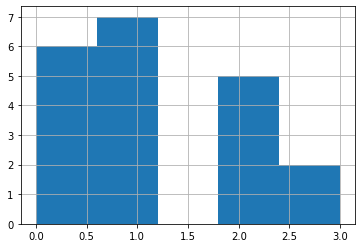

In [22]:
import numpy as np
df = pd.DataFrame(np.nan, index=[0,1,2,3], columns=['A'])
print(df)

df.isnull()
df.isnull().mean()

#eda
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame( [1,0,0,1,2,1,1,1,0,0,0,2,2,1,3,3,2,2,1,0], columns=['v1'])
data.dtypes #컬럼별 값의 타잎

data['v1'].unique()

#Histogram
data['v1'].hist(bins=5)

#8. 데이터프레임 형태 변경

In [23]:
#피벗
#values: 피벗테이블 정리를 원하는 값
#columns: 피벗의 열
#index: 피벗의 행

products = pd.DataFrame({'category': ['Cleaning', 'Cleaning', 'Entertainment', 'Entertainment', 'Tech', 'Tech'],'store': ['Walmart', 'Dia', 'Walmart', 'Fnac', 'Dia','Walmart'],'price':[11.42, 23.50, 19.99, 15.95, 55.75, 111.55],'testscore': [4, 3, 5, 7, 5, 8]})

pivot_products = products.pivot(index='category', columns='store', values='price')
print(pivot_products)

pivot_products2 = products.pivot_table(index='category', columns='store', values='price', aggfunc='mean')
print(pivot_products2)

#Melting
people = pd.DataFrame({'FirstName' : ['John', 'Jane'],'LastName' : ['Doe', 'Austen'],'BloodType' : ['A-', 'B+'],'Weight' : [90, 64]})
print(pd.melt(people, id_vars=['FirstName', 'LastName'], var_name='measurements'))


store            Dia   Fnac  Walmart
category                            
Cleaning       23.50    NaN    11.42
Entertainment    NaN  15.95    19.99
Tech           55.75    NaN   111.55
store            Dia   Fnac  Walmart
category                            
Cleaning       23.50    NaN    11.42
Entertainment    NaN  15.95    19.99
Tech           55.75    NaN   111.55
  FirstName LastName measurements value
0      John      Doe    BloodType    A-
1      Jane   Austen    BloodType    B+
2      John      Doe       Weight    90
3      Jane   Austen       Weight    64


#9. 데이터프레임 연산

In [24]:
df2 = pd.DataFrame( np.array( [[1,2], [3,4], [5,6]] ))

df1 = pd.DataFrame( [[1,2], [3,4], [5,6]],
                   index=['a', 'b', 'c'],
                   columns= ['c1','c2']  )

df1.index = ['2022-04-28','2022-04-29', '2022-04-30']
df2.index = ['2022-04-26','2022-04-27', '2022-04-28']

df1.columns = ['c1', 'c2']
df2.columns = ['c2', 'c3']

print(df1+df2)


            c1   c2  c3
2022-04-26 NaN  NaN NaN
2022-04-27 NaN  NaN NaN
2022-04-28 NaN  7.0 NaN
2022-04-29 NaN  NaN NaN
2022-04-30 NaN  NaN NaN


#10. 파일쓰기 및 읽기

In [25]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])

df.to_csv('test.csv', sep='\t', encoding='utf-8')

writer = pd.ExcelWriter('test.xlsx')
df.to_excel(writer, 'DataFrame')
writer.save()

#한글 파일 중 CP949인코딩
df2 = pd.read_csv("train_df.csv", encoding="CP949")